### Se pide:

A partir del archivo "USA_Housing.csv", realizar la regresión lineal entre cada columna numérica con la columna 'price'. 

Cuando existe una columna(variable) que es la que se quiere comparar, se le llama 'target'. 

In [2]:
import numpy as np # linear algebra
import pandas as pd # data prçocessing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

In [3]:


df = pd.read_csv("../data/USA_Housing.csv")
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [5]:
df.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


<AxesSubplot:xlabel='Price'>

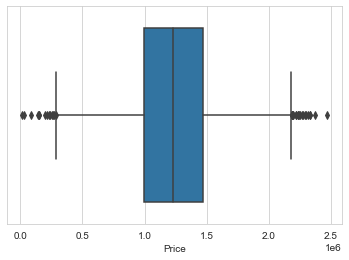

In [72]:
sns.boxplot(x=df['Price'])

In [109]:
# he intentado quitar outlaiers pero no ha salido bien
"""
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price']]))
print(z)
"""

SyntaxError: EOF while scanning triple-quoted string literal (<ipython-input-109-a861750dd9bf>, line 6)

In [77]:
"""
dfo1 = df[(z < 3).all(axis=1)]
"""

In [82]:
"""
print("Original Shape", df.shape)
print('New Shape', dfo1.shape)
"""

Original Shape (5000, 7)
New Shape (4943, 7)


# Training a Linear Regression

In [83]:
dfo1.columns


Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [84]:
X = dfo1[['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population']]

In [85]:
y = dfo1['Price']

In [86]:
X

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
0,79545.458574,5.682861,7.009188,4.09,23086.800503
1,79248.642455,6.002900,6.730821,3.09,40173.072174
2,61287.067179,5.865890,8.512727,5.13,36882.159400
3,63345.240046,7.188236,5.586729,3.26,34310.242831
4,59982.197226,5.040555,7.839388,4.23,26354.109472
...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035
4996,78491.275435,6.999135,6.576763,4.02,25616.115489
4997,63390.686886,7.250591,4.805081,2.13,33266.145490
4998,68001.331235,5.534388,7.130144,5.44,42625.620156


In [87]:
y

0       1.059034e+06
1       1.505891e+06
2       1.058988e+06
3       1.260617e+06
4       6.309435e+05
            ...     
4995    1.060194e+06
4996    1.482618e+06
4997    1.030730e+06
4998    1.198657e+06
4999    1.298950e+06
Name: Price, Length: 4943, dtype: float64

## Training

In [88]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state=150)
# cambiar el random_state 

In [89]:
X.shape

(4943, 5)

In [90]:
X_train.shape

(3707, 5)

In [91]:
y_train.shape

(3707,)

In [92]:
X_test.shape

(1236, 5)

In [93]:
y_test.shape

(1236,)

In [94]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression(n_jobs= -1)

In [96]:
lm.fit(X_train, y_train)

LinearRegression(n_jobs=-1)

In [97]:
lm.score(X,y)

0.9148218374828513

## Evaluate the model

In [98]:
print(lm.intercept_)

-2619725.7272875495


In [99]:
lm.coef_

array([2.15681053e+01, 1.64903755e+05, 1.19085007e+05, 1.44767588e+03,
       1.51456129e+01])

In [100]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=["Coefficient"])
coeff_df

,Coefficient
Avg. Area Income,21.568105
Avg. Area House Age,164903.755034
Avg. Area Number of Rooms,119085.007451
Avg. Area Number of Bedrooms,1447.675878
Area Population,15.145613


In [101]:
"""from sklearn.metrics import mean_squared_error
housing_predictions = lin_reg.predict(housing_prepared)
lin_mse = mean_squared_error(housing_labels, housing_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse
"""

'from sklearn.metrics import mean_squared_error\nhousing_predictions = lin_reg.predict(housing_prepared)\nlin_mse = mean_squared_error(housing_labels, housing_predictions)\nlin_rmse = np.sqrt(lin_mse)\nlin_rmse\n'

## PRedictions from our Model


In [102]:
X_test

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population
2619,65197.995424,6.810647,5.617602,4.18,28162.440645
3394,82903.969390,6.030295,6.226412,2.36,44146.224810
629,77797.394964,7.440521,6.229360,2.06,33847.014509
4527,65221.126556,5.604023,7.844858,5.44,34752.938250
2219,53409.276977,6.495544,7.274837,4.02,22522.881604
...,...,...,...,...,...
2456,67041.967661,6.021458,5.346830,3.39,15633.099048
212,79471.238817,5.867270,8.197289,6.21,36616.168834
3849,61943.191649,7.202717,6.613983,3.07,41204.710393
3570,50337.067497,4.853508,6.241565,4.22,32299.064648


In [103]:
lm.score(X_train, y_train)*100

91.2494064619692

In [104]:
lm.score(X_test, y_test)

0.9217425563597158

In [105]:
predictions = lm.predict(X_test)

In [106]:
new_home = np.array(
            [[100000.0, 20.0, 8.0, 7.0, 100000.0],
             [200000.0, 40.0, 16.0, 15.0, 110000.0]]
             )
lm.predict(new_home)

array([ 5312534.99171745, 11883138.22112685])

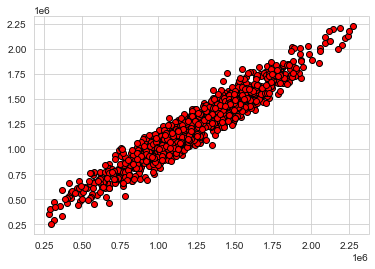

In [107]:
plt.scatter(y_test, predictions,color='r', edgecolors='black')

In [108]:
sns.displot((y_test-predictions), bins = 50, hist_kws=dict(edgecolor="black", linewidth=1),color='Blue')

AttributeError: 'Rectangle' object has no property 'hist_kws'